# Import

In [1]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Datasets

## Reading and Understanding

In [2]:
df = pd.read_csv('kemiskinan.csv', sep=';') # If the delimiter is a semicolon

In [3]:
df.head()

,No,ID Keluarga P3KE,Dimuktakhirkan Tahun,Provinsi,Kabupaten/Kota,Kecamatan,Desa/Kelurahan,Kode Kemdagri,Desil Kesejahteraan,Persentil,...,Sumber Air Minum,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR
0,1,100469014,2021,JAWA TENGAH,KUDUS,KALIWUNGU,BAKALANKRAPYAK,3319012001,1,5,...,Sumur Bor,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Tidak,Ya,Tidak,Ya,Tidak
1,2,107530405,2021,JAWA TENGAH,KUDUS,KALIWUNGU,BAKALANKRAPYAK,3319012001,1,3,...,Sumur Terlindung,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
2,3,111876773,2021,JAWA TENGAH,KUDUS,KALIWUNGU,BAKALANKRAPYAK,3319012001,1,8,...,Sumur Terlindung,Milik sendiri,Bukan Target Sasaran,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ya
3,4,130713310,2021,JAWA TENGAH,KUDUS,KALIWUNGU,BAKALANKRAPYAK,3319012001,1,2,...,Sumur Terlindung,Milik sendiri,Tidak Beresiko Stunting,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
4,5,189321171,2022,JAWA TENGAH,KUDUS,KALIWUNGU,BAKALANKRAPYAK,3319012001,1,7,...,Sumur Bor,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Ya,Ya,Ya,Tidak,Tidak


In [4]:
# shape of df

df.shape

(95066, 42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95066 entries, 0 to 95065
Data columns (total 42 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   No                                               95066 non-null  int64 
 1   ID Keluarga P3KE                                 95066 non-null  int64 
 2   Dimuktakhirkan Tahun                             95066 non-null  int64 
 3   Provinsi                                         95066 non-null  object
 4   Kabupaten/Kota                                   95066 non-null  object
 5   Kecamatan                                        95066 non-null  object
 6   Desa/Kelurahan                                   95066 non-null  object
 7   Kode Kemdagri                                    95066 non-null  int64 
 8   Desil Kesejahteraan                              95066 non-null  int64 
 9   Persentil                              

In [6]:
# df description

df.describe()

,No,ID Keluarga P3KE,Dimuktakhirkan Tahun,Kode Kemdagri,Desil Kesejahteraan,Persentil
count,95066.000000,9.506600e+04,95066.000000,9.506600e+04,95066.000000,95066.000000
mean,47533.500000,1.665911e+08,2021.645783,3.319055e+09,2.620916,21.395041
std,27443.334683,3.177602e+07,0.478278,2.778325e+04,1.055652,10.825575
min,1.000000,1.000025e+08,2021.000000,3.319012e+09,1.000000,1.000000
25%,23767.250000,1.337413e+08,2021.000000,3.319032e+09,2.000000,13.000000
50%,47533.500000,1.893604e+08,2022.000000,3.319062e+09,3.000000,22.000000
75%,71299.750000,1.894273e+08,2022.000000,3.319082e+09,3.000000,30.000000
max,95066.000000,1.894914e+08,2022.000000,3.319092e+09,4.000000,40.000000


In [7]:
# menampilkan jumlah yang hilang atau missing values
print(f"Is null:")
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#FEFAE0","color":"#BC6C25","border": "1.5px  solid black"})

Is null:


,No,ID Keluarga P3KE,Dimuktakhirkan Tahun,Provinsi,Kabupaten/Kota,Kecamatan,Desa/Kelurahan,Kode Kemdagri,Desil Kesejahteraan,Persentil,Alamat,Prioritas Verval,Nama Kepala Keluarga,NIK Kepala Keluarga,NIK Kepala Keluarga Padan Kemdagri,Jenis Kelamin Kepala Keluarga,Tanggal Lahir Kepala Keluarga,Pekerjaan Kepala Keluarga,Status Pekerjaan Kepala Keluarga,Pendidikan Kepala Keluarga,Status Kawin Kepala Keluarga,Kepemilikan Rumah,Memiliki Simpanan Uang/Perhiasan/Ternak/Lainnya,Jenis Atap,Kualitas Atap,Jenis Dinding,Kualitas Dinding,Jenis Lantai,Kualitas Lantai,Sumber Penerangan,Daya Listrik Terpasang,Bahan Bakar Memasak,Sumber Air Minum,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Cleansing

In [8]:
# Calculating the Missing Values % contribution in DF
# Menghitung persentase kontribusi nilai yang hilang (missing values) di setiap kolom dari sebuah DataFrame
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

,0
No,0.00
ID Keluarga P3KE,0.00
Dimuktakhirkan Tahun,0.00
Provinsi,0.00
Kabupaten/Kota,0.00
Kecamatan,0.00
Desa/Kelurahan,0.00
Kode Kemdagri,0.00
Desil Kesejahteraan,0.00
Persentil,0.00


In [9]:
# Droping rows having missing values
# Menghapus baris yang memiliki missing values (NaN) dari DataFrame
df_new = df.dropna()
df_new.shape

(94661, 42)

In [10]:
# Daftar kolom yang ingin dibuang
columns_to_drop = ['No', 'ID Keluarga P3KE', 'Desa/Kelurahan', 'Dimuktakhirkan Tahun', 'Provinsi', 'Kabupaten/Kota', 'Kode Kemdagri', 'Alamat', 'Nama Kepala Keluarga', 'NIK Kepala Keluarga', 'Tanggal Lahir Kepala Keluarga']

# Menghapus kolom yang tidak diperlukan
df_cleaned = df_new.drop(columns=columns_to_drop)

print(df_cleaned)

       Kecamatan  Desil Kesejahteraan  Persentil  \
0      KALIWUNGU                    1          5   
1      KALIWUNGU                    1          3   
2      KALIWUNGU                    1          8   
3      KALIWUNGU                    1          2   
4      KALIWUNGU                    1          7   
...          ...                  ...        ...   
95061       DAWE                    4         36   
95062       DAWE                    4         36   
95063       DAWE                    4         33   
95064       DAWE                    4         33   
95065       DAWE                    4         39   

                     Prioritas Verval NIK Kepala Keluarga Padan Kemdagri  \
0                              Normal                        Tidak Padan   
1                              Normal                        Tidak Padan   
2                              Normal                              Padan   
3                              Normal                        Tidak Pada

In [11]:
df_cleaned.head()

,Kecamatan,Desil Kesejahteraan,Persentil,Prioritas Verval,NIK Kepala Keluarga Padan Kemdagri,Jenis Kelamin Kepala Keluarga,Pekerjaan Kepala Keluarga,Status Pekerjaan Kepala Keluarga,Pendidikan Kepala Keluarga,Status Kawin Kepala Keluarga,...,Sumber Air Minum,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR
0,KALIWUNGU,1,5,Normal,Tidak Padan,Laki-laki,Tidak/Belum Bekerja,Kosong,Tamat SD/Sederajat,Kawin,...,Sumur Bor,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Tidak,Ya,Tidak,Ya,Tidak
1,KALIWUNGU,1,3,Normal,Tidak Padan,Perempuan,Pedagang,Kosong,Tamat SD/Sederajat,Cerai Mati,...,Sumur Terlindung,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
2,KALIWUNGU,1,8,Normal,Padan,Laki-laki,Wiraswasta,Kosong,Tamat SLTA/Sederajat,Kawin,...,Sumur Terlindung,Milik sendiri,Bukan Target Sasaran,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ya
3,KALIWUNGU,1,2,Normal,Tidak Padan,Laki-laki,Wiraswasta,Kosong,Tamat SLTP/Sederajat,Kawin,...,Sumur Terlindung,Milik sendiri,Tidak Beresiko Stunting,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
4,KALIWUNGU,1,7,Normal,Padan,Perempuan,Pensiunan,Kosong,Tamat SD/Sederajat,Cerai Hidup,...,Sumur Bor,Milik sendiri,Bukan Target Sasaran,Ya,Tidak,Ya,Ya,Ya,Tidak,Tidak


In [12]:
# Mengubah data kategorikal menjadi data numerik dengan menggunakan Label Encoding
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ['Kecamatan','Prioritas Verval', 'NIK Kepala Keluarga Padan Kemdagri', 'Jenis Kelamin Kepala Keluarga', 'Pekerjaan Kepala Keluarga', 'Status Pekerjaan Kepala Keluarga', 'Pendidikan Kepala Keluarga', 'Status Kawin Kepala Keluarga', 'Kepemilikan Rumah', 'Memiliki Simpanan Uang/Perhiasan/Ternak/Lainnya', 'Jenis Atap', 'Kualitas Atap', 'Jenis Dinding', 'Kualitas Dinding', 'Jenis Lantai', 'Kualitas Lantai', 'Sumber Penerangan', 'Daya Listrik Terpasang', 'Bahan Bakar Memasak', 'Sumber Air Minum', 'Memiliki fasilitas Buang Air Besar', 'Resiko Stunting', 'Penerima BPNT', 'Penerima BPUM', 'Penerima BST', 'Penerima PKH', 'Penerima SEMBAKO', 'Penerima Prakerja', 'Penerima KUR']

# Apply Label Encoding to each column
label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

    # Simpan label encoder untuk setiap kolom
    label_encoders[column] = le

# Tampilkan label encoder untuk satu kolom, misalnya "Pendidikan Kepala Keluarga"
print(dict(zip(label_encoders['Pendidikan Kepala Keluarga'].classes_, label_encoders['Pendidikan Kepala Keluarga'].transform(label_encoders['Pendidikan Kepala Keluarga'].classes_))))

{'Masih PT/Akademi': 0, 'Masih SD/Sederajat': 1, 'Masih SLTA/Sederajat': 2, 'Masih SLTP/Sederajat': 3, 'Tamat PT/Akademi': 4, 'Tamat SD/Sederajat': 5, 'Tamat SLTA/Sederajat': 6, 'Tamat SLTP/Sederajat': 7, 'Tdk Tamat SD/Sederajat': 8, 'Tidak/Belum Sekolah': 9}


In [13]:
# Menampilkan mapping antara kategori asli (string atau teks) dan nilai numerik hasil Label Encoding untuk setiap kolom dalam columns_to_encode
for column in columns_to_encode:
    print(f"Kolom: {column}")
    print(dict(zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_))))
    print("\n")

Kolom: Kecamatan
{'BAE': 0, 'DAWE': 1, 'GEBOG': 2, 'JATI': 3, 'JEKULO': 4, 'KALIWUNGU': 5, 'KOTA KUDUS': 6, 'MEJOBO': 7, 'UNDAAN': 8}


Kolom: Prioritas Verval
{'Keluarga Duplikat (NIK & Nama)': 0, 'Keluarga tidak ada usia 17+ tahun': 1, 'Normal': 2}


Kolom: NIK Kepala Keluarga Padan Kemdagri
{'Padan': 0, 'Tidak Padan': 1}


Kolom: Jenis Kelamin Kepala Keluarga
{'Laki-laki': 0, 'Perempuan': 1}


Kolom: Pekerjaan Kepala Keluarga
{'Nelayan': 0, 'PNS/TNI/Polri': 1, 'Pedagang': 2, 'Pegawai Swasta': 3, 'Pejabat Negara': 4, 'Pekerja Lepas': 5, 'Pensiunan': 6, 'Petani': 7, 'Tidak/Belum Bekerja': 8, 'Wiraswasta': 9}


Kolom: Status Pekerjaan Kepala Keluarga
{'Berusaha Sendiri': 0, 'Berusaha dibantu Buruh Tetap/Dibayar': 1, 'Berusaha dibantu Buruh Tidak Tetap/Buruh Tidak Dibayar': 2, 'Buruh/Karyawan/Pegawai': 3, 'Kosong': 4, 'Pekerja Bebas': 5, 'Pekerja Keluarga/Tidak Dibayar': 6}


Kolom: Pendidikan Kepala Keluarga
{'Masih PT/Akademi': 0, 'Masih SD/Sederajat': 1, 'Masih SLTA/Sederajat': 2, 'M

In [14]:
df_cleaned.head()

,Kecamatan,Desil Kesejahteraan,Persentil,Prioritas Verval,NIK Kepala Keluarga Padan Kemdagri,Jenis Kelamin Kepala Keluarga,Pekerjaan Kepala Keluarga,Status Pekerjaan Kepala Keluarga,Pendidikan Kepala Keluarga,Status Kawin Kepala Keluarga,...,Sumber Air Minum,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR
0,5,1,5,2,1,0,8,4,5,3,...,5,2,1,1,0,0,1,0,1,0
1,5,1,3,2,1,1,2,4,5,2,...,6,2,1,1,0,0,0,0,0,0
2,5,1,8,2,0,0,9,4,6,3,...,6,2,1,0,1,0,0,0,0,1
3,5,1,2,2,1,0,9,4,7,3,...,6,2,2,0,1,0,0,0,0,0
4,5,1,7,2,0,1,6,4,5,1,...,5,2,1,1,0,1,1,1,0,0


In [15]:
# Mengubah seluruh kolom menjadi int64
df_cleaned = df_cleaned.astype('int64')

In [16]:
print(f"Shape: {df_cleaned.shape}")
print(f"\nDataset in a nutshell:")
df_cleaned.head().style.set_properties(**{"background-color": "#FEFAE0","color": "#BC6C25","border": "1.5px  solid black"})

Shape: (94661, 31)

Dataset in a nutshell:


,Kecamatan,Desil Kesejahteraan,Persentil,Prioritas Verval,NIK Kepala Keluarga Padan Kemdagri,Jenis Kelamin Kepala Keluarga,Pekerjaan Kepala Keluarga,Status Pekerjaan Kepala Keluarga,Pendidikan Kepala Keluarga,Status Kawin Kepala Keluarga,Kepemilikan Rumah,Memiliki Simpanan Uang/Perhiasan/Ternak/Lainnya,Jenis Atap,Kualitas Atap,Jenis Dinding,Kualitas Dinding,Jenis Lantai,Kualitas Lantai,Sumber Penerangan,Daya Listrik Terpasang,Bahan Bakar Memasak,Sumber Air Minum,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR
0,5,1,5,2,1,0,8,4,5,3,4,2,3,2,4,2,2,2,1,0,2,5,2,1,1,0,0,1,0,1,0
1,5,1,3,2,1,1,2,4,5,2,4,1,3,2,4,2,2,2,1,1,2,6,2,1,1,0,0,0,0,0,0
2,5,1,8,2,0,0,9,4,6,3,4,2,3,2,4,2,2,2,1,0,2,6,2,1,0,1,0,0,0,0,1
3,5,1,2,2,1,0,9,4,7,3,4,1,3,2,4,2,2,2,1,0,2,6,2,2,0,1,0,0,0,0,0
4,5,1,7,2,0,1,6,4,5,1,4,2,3,0,4,0,2,0,1,0,2,5,2,1,1,0,1,1,1,0,0


In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94661 entries, 0 to 95065
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Kecamatan                                        94661 non-null  int64
 1   Desil Kesejahteraan                              94661 non-null  int64
 2   Persentil                                        94661 non-null  int64
 3   Prioritas Verval                                 94661 non-null  int64
 4   NIK Kepala Keluarga Padan Kemdagri               94661 non-null  int64
 5   Jenis Kelamin Kepala Keluarga                    94661 non-null  int64
 6   Pekerjaan Kepala Keluarga                        94661 non-null  int64
 7   Status Pekerjaan Kepala Keluarga                 94661 non-null  int64
 8   Pendidikan Kepala Keluarga                       94661 non-null  int64
 9   Status Kawin Kepala Keluarga                     94661 

##Preprocessing Data

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94661 entries, 0 to 95065
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Kecamatan                                        94661 non-null  int64
 1   Desil Kesejahteraan                              94661 non-null  int64
 2   Persentil                                        94661 non-null  int64
 3   Prioritas Verval                                 94661 non-null  int64
 4   NIK Kepala Keluarga Padan Kemdagri               94661 non-null  int64
 5   Jenis Kelamin Kepala Keluarga                    94661 non-null  int64
 6   Pekerjaan Kepala Keluarga                        94661 non-null  int64
 7   Status Pekerjaan Kepala Keluarga                 94661 non-null  int64
 8   Pendidikan Kepala Keluarga                       94661 non-null  int64
 9   Status Kawin Kepala Keluarga                     94661 

In [19]:
print(df['Kualitas Lantai'].unique())


['Kosong' 'Bagus/Kualitas Tinggi' 'Jelek/Kualitas Rendah']


In [20]:
kualitas_count = df['Kualitas Lantai'].value_counts()
print(kualitas_count)


Kualitas Lantai
Bagus/Kualitas Tinggi    53817
Kosong                   33674
Jelek/Kualitas Rendah     7575
Name: count, dtype: int64


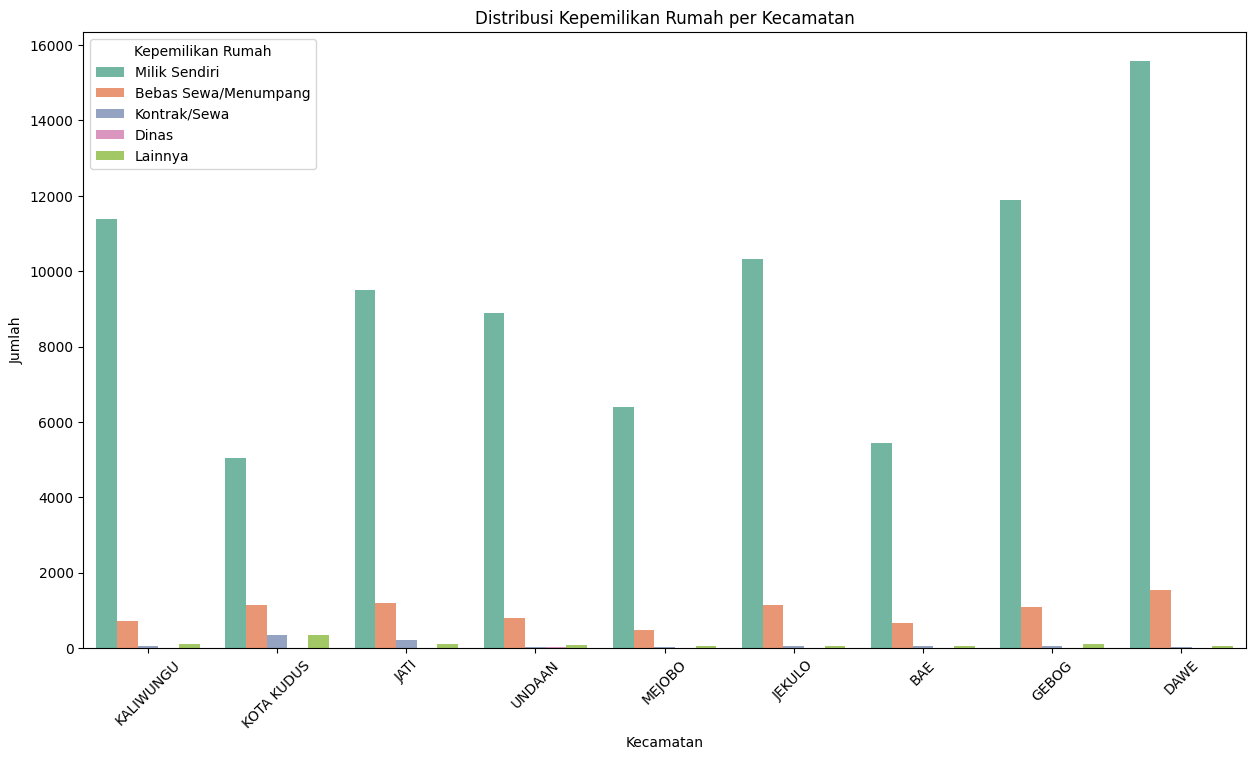

In [27]:
# Plot hubungan antara Kecamatan dan Kepemilikan Rumah
plt.figure(figsize=(15, 8))
sns.countplot(x="Kecamatan", hue="Kepemilikan Rumah", data=df, palette="Set2")
plt.title("Distribusi Kepemilikan Rumah per Kecamatan")
plt.xlabel("Kecamatan")
plt.ylabel("Jumlah")
plt.legend(title="Kepemilikan Rumah")
plt.xticks(rotation=45)
plt.show()

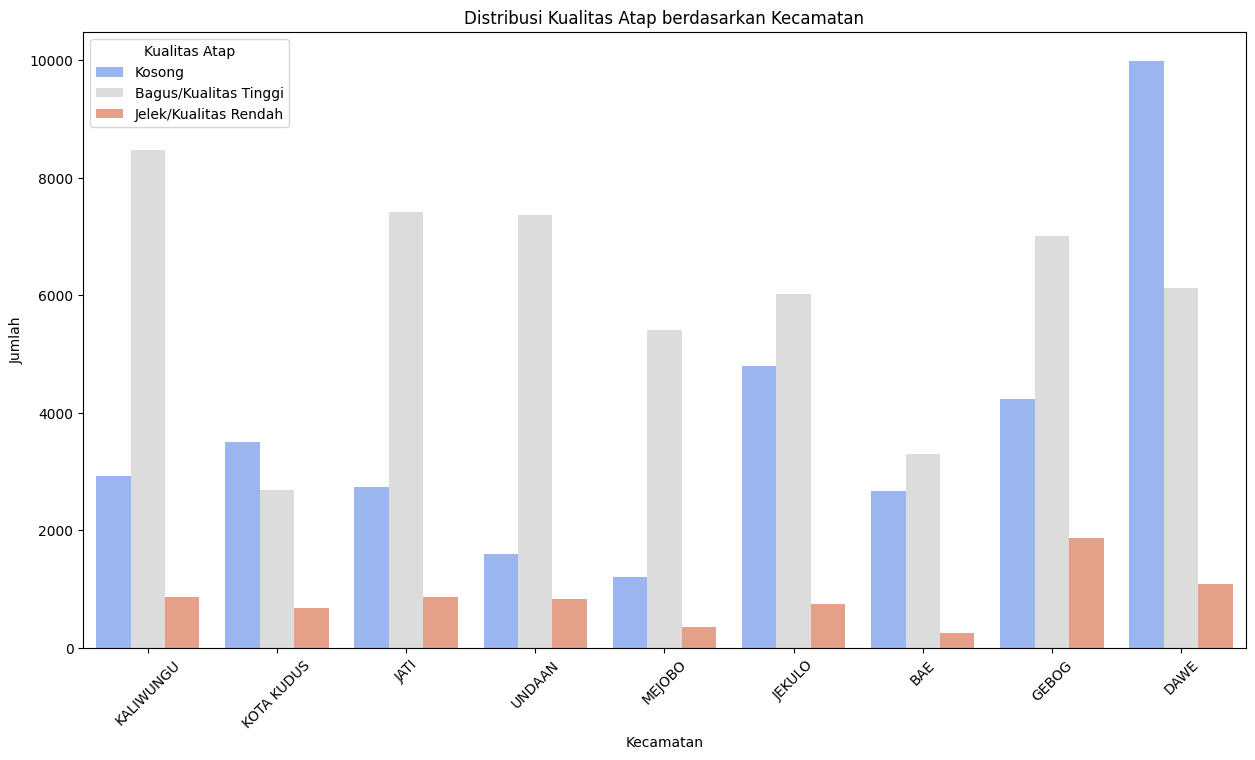

In [28]:
# Plot 2: Kualitas Atap berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Kualitas Atap', data=df, palette='coolwarm')
plt.title('Distribusi Kualitas Atap berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Kualitas Atap')
plt.xticks(rotation=45)
plt.show()

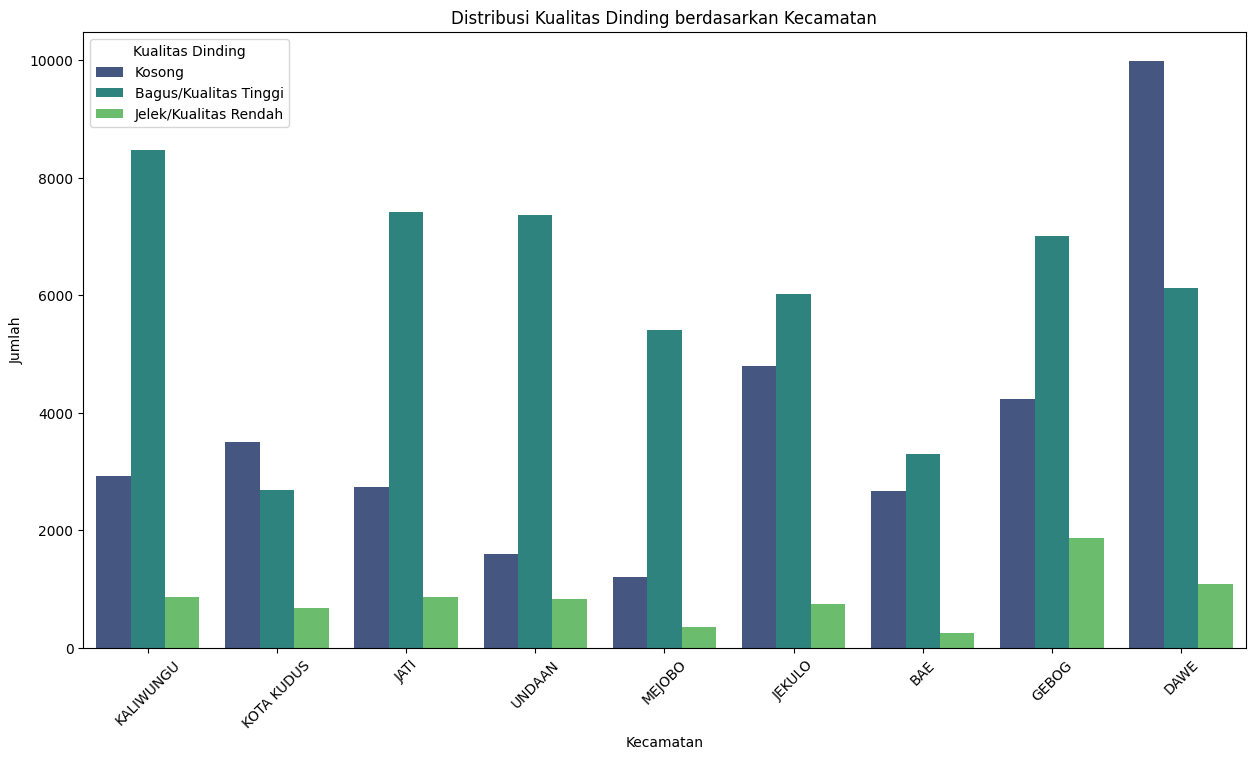

In [29]:
# Plot 3: Kualitas Dinding berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Kualitas Dinding', data=df, palette='viridis')
plt.title('Distribusi Kualitas Dinding berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Kualitas Dinding')
plt.xticks(rotation=45)
plt.show()

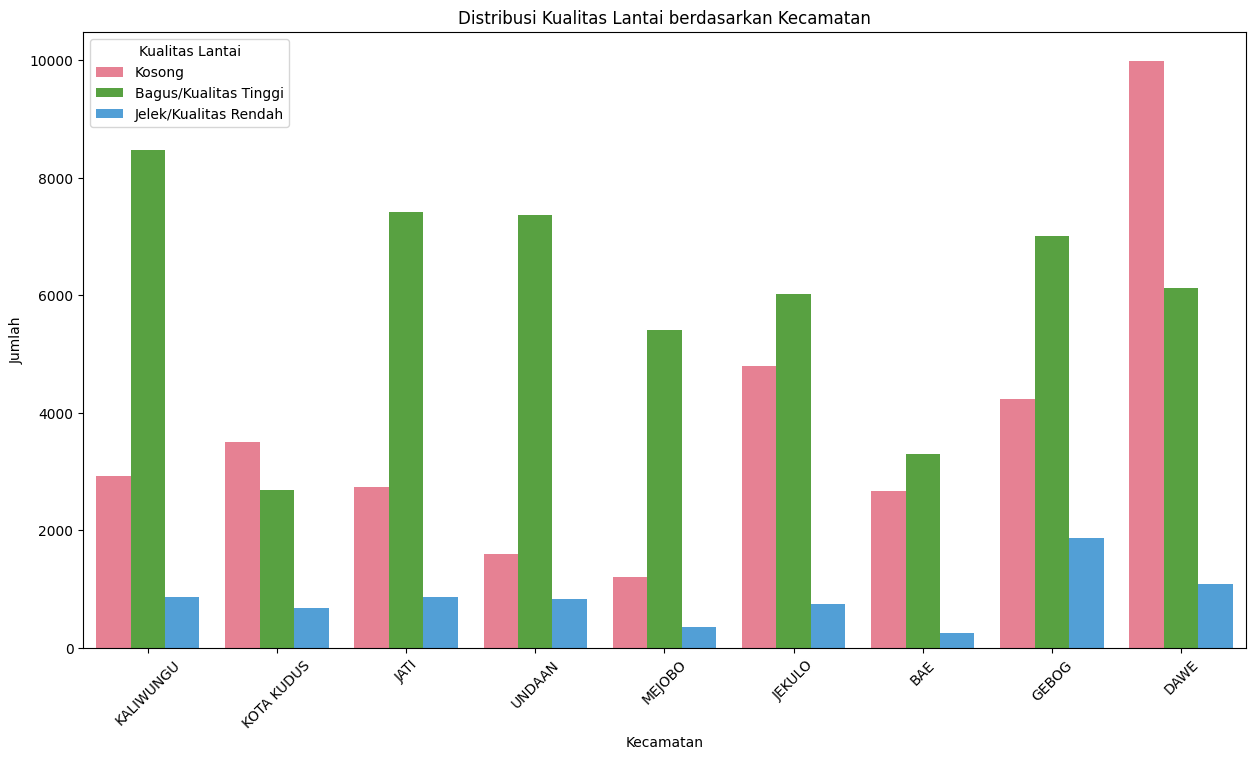

In [30]:
# Plot 4: Kualitas Lantai berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Kualitas Lantai', data=df, palette='husl')
plt.title('Distribusi Kualitas Lantai berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Kualitas Lantai')
plt.xticks(rotation=45)
plt.show()

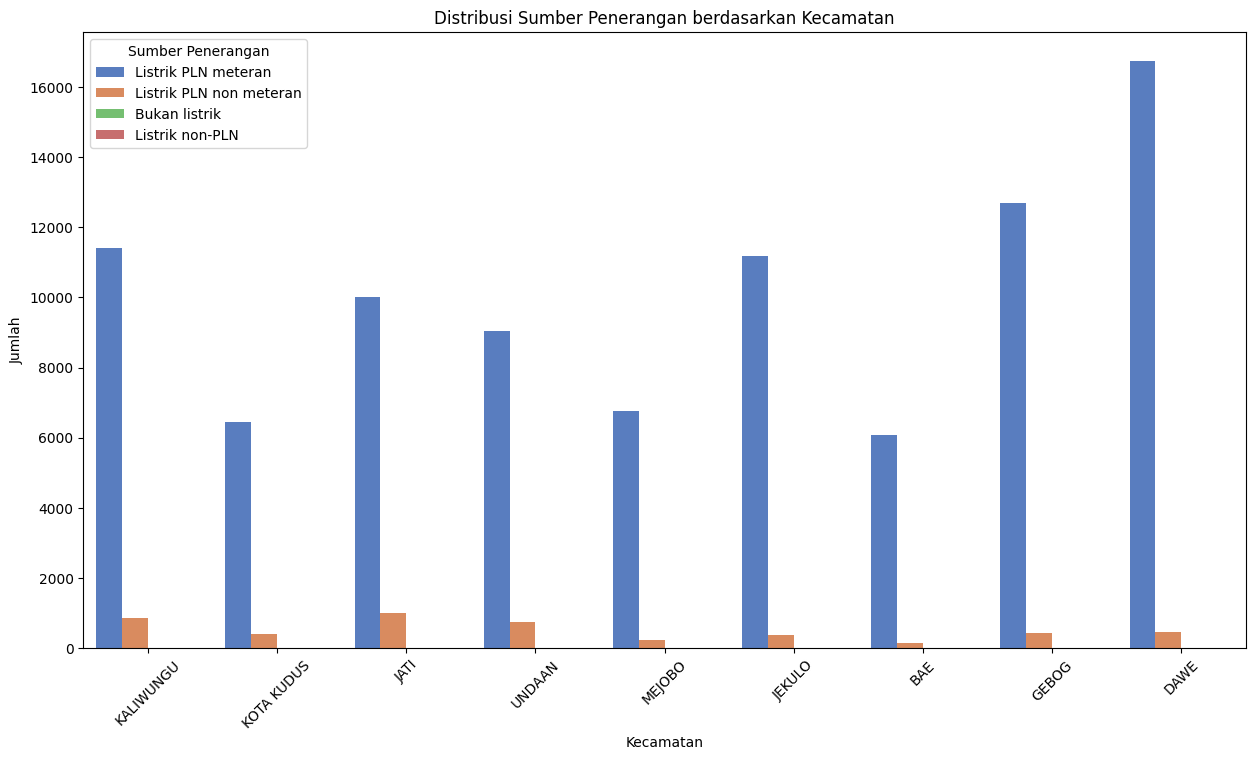

In [31]:
# Plot 5: Sumber Penerangan berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Sumber Penerangan', data=df, palette='muted')
plt.title('Distribusi Sumber Penerangan berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Sumber Penerangan')
plt.xticks(rotation=45)
plt.show()

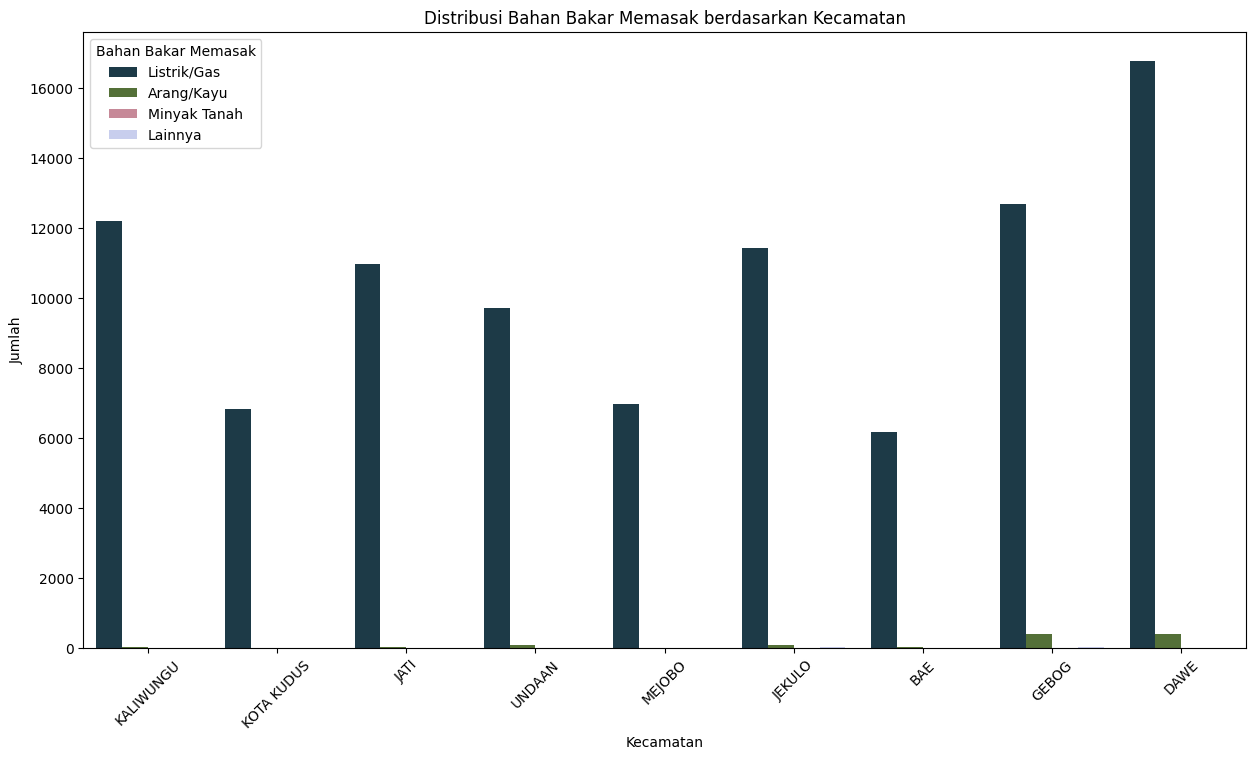

In [32]:
# Plot 6: Bahan Bakar Memasak berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Bahan Bakar Memasak', data=df, palette='cubehelix')
plt.title('Distribusi Bahan Bakar Memasak berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Bahan Bakar Memasak')
plt.xticks(rotation=45)
plt.show()

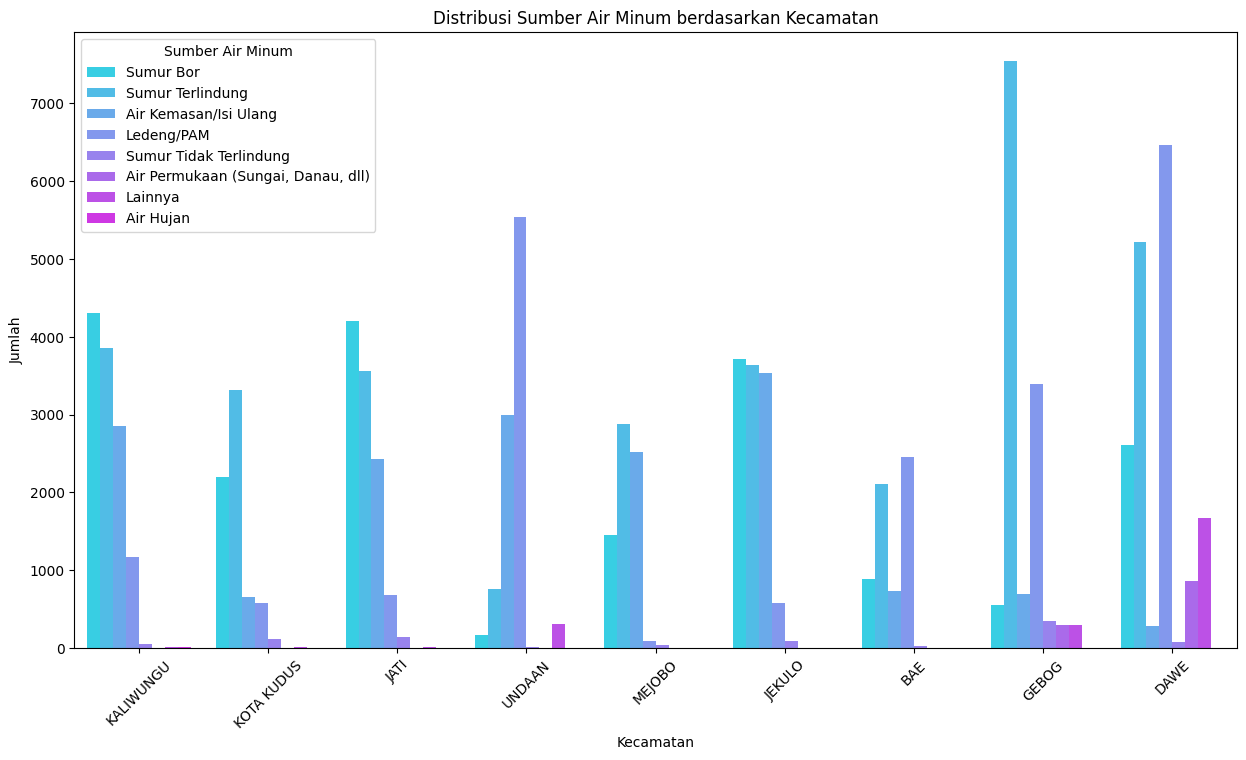

In [33]:
# Plot 7: Sumber Air Minum berdasarkan Kecamatan
plt.figure(figsize=(15, 8))
sns.countplot(x='Kecamatan', hue='Sumber Air Minum', data=df, palette='cool')
plt.title('Distribusi Sumber Air Minum berdasarkan Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah')
plt.legend(title='Sumber Air Minum')
plt.xticks(rotation=45)
plt.show()

In [73]:
# Step 2: Encoding Variabel Kategorikal Menjadi Numerik
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  # Jika kolomnya bertipe object (kategorikal)
        df[column] = le.fit_transform(df[column])


In [74]:
# Step 2: Memilih variabel numerik yang relevan untuk klasterisasi
X = df_cleaned[["Kepemilikan Rumah", "Kualitas Atap", "Kualitas Dinding",
        "Kualitas Lantai", "Sumber Penerangan", "Bahan Bakar Memasak", "Sumber Air Minum"]]

<ipython-input-76-797f13056e7d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned["Kepemilikan Rumah"])


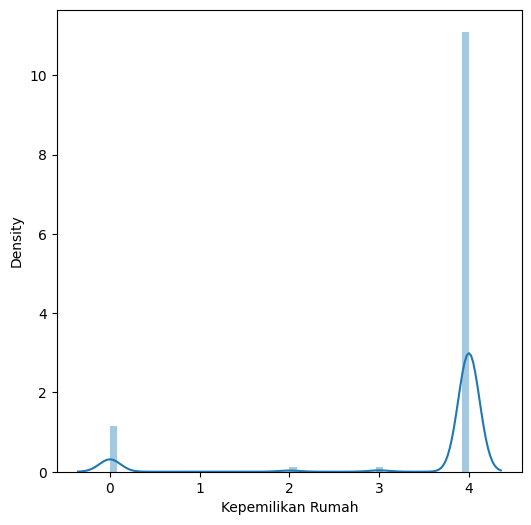

In [76]:
plt.figure(figsize=(6, 6))
sns.distplot(df_cleaned["Kepemilikan Rumah"])
plt.xlabel("Kepemilikan Rumah")
plt.show()

<ipython-input-77-2b6edf427a64>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned["Kualitas Atap"])


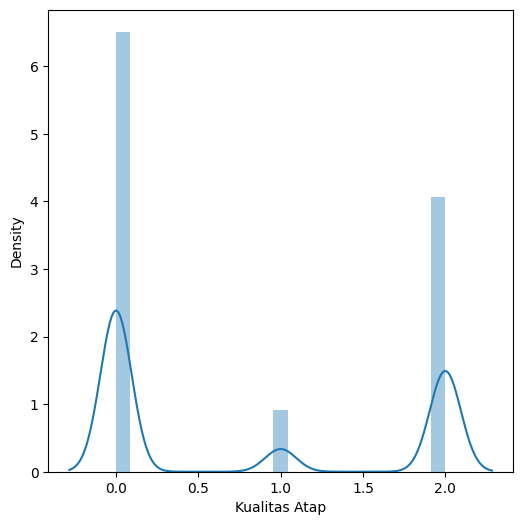

In [77]:
plt.figure(figsize=(6, 6))
sns.distplot(df_cleaned["Kualitas Atap"])
plt.xlabel("Kualitas Atap")
plt.show()

<ipython-input-78-91f7775f5a37>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned["Kualitas Dinding"])


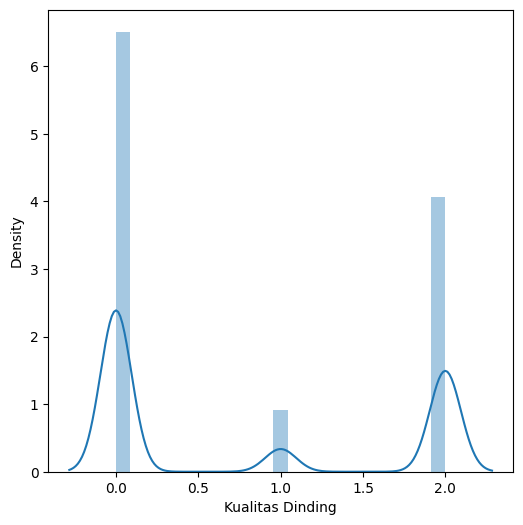

In [78]:
plt.figure(figsize=(6, 6))
sns.distplot(df_cleaned["Kualitas Dinding"])
plt.xlabel("Kualitas Dinding")
plt.show()

<ipython-input-79-0fec73813e8b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned["Kualitas Lantai"])


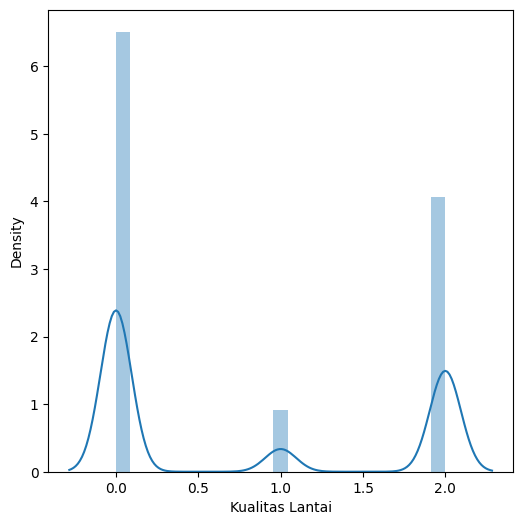

In [79]:
plt.figure(figsize=(6, 6))
sns.distplot(df_cleaned["Kualitas Lantai"])
plt.xlabel("Kualitas Lantai")
plt.show()

<ipython-input-80-9b7537e70c30>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned["Sumber Penerangan"])


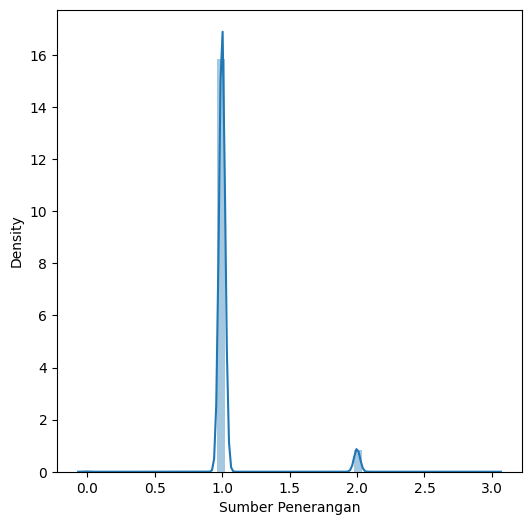

In [80]:
plt.figure(figsize=(6, 6))
sns.distplot(df_cleaned["Sumber Penerangan"])
plt.xlabel("Sumber Penerangan")
plt.show()

<ipython-input-81-b593e6b5be11>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned["Bahan Bakar Memasak"])


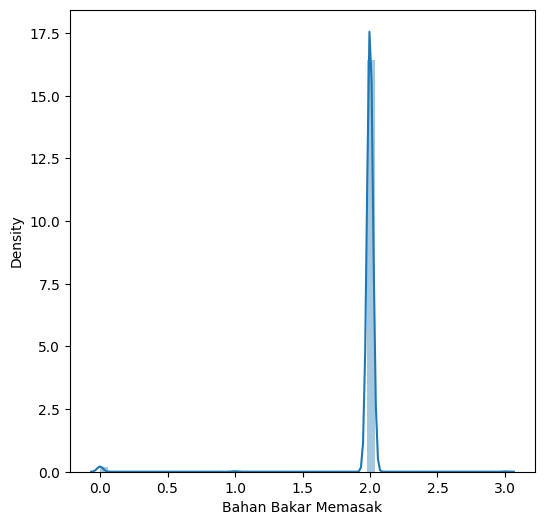

In [81]:
plt.figure(figsize=(6, 6))
sns.distplot(df_cleaned["Bahan Bakar Memasak"])
plt.xlabel("Bahan Bakar Memasak")
plt.show()

<ipython-input-82-efd15acb4341>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned["Sumber Air Minum"])


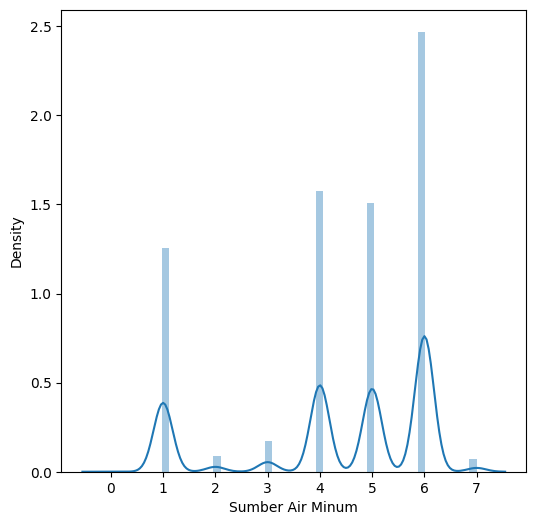

In [82]:
plt.figure(figsize=(6, 6))
sns.distplot(df_cleaned["Sumber Air Minum"])
plt.xlabel("Sumber Air Minum")
plt.show()

<ipython-input-84-ed9d3551de5e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned["Kecamatan"])


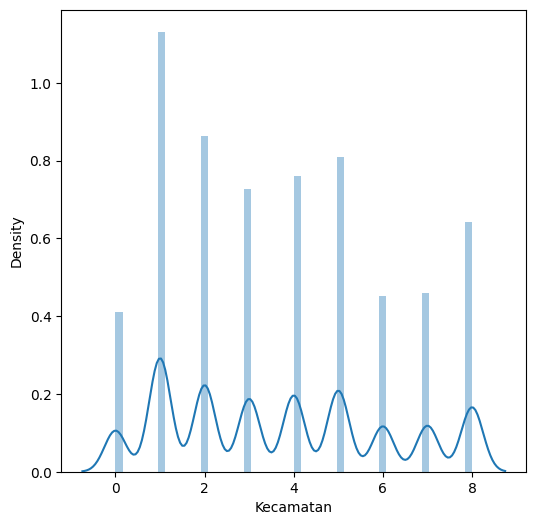

In [84]:
plt.figure(figsize=(6, 6))
sns.distplot(df_cleaned["Kecamatan"])
plt.xlabel("Kecamatan")
plt.show()

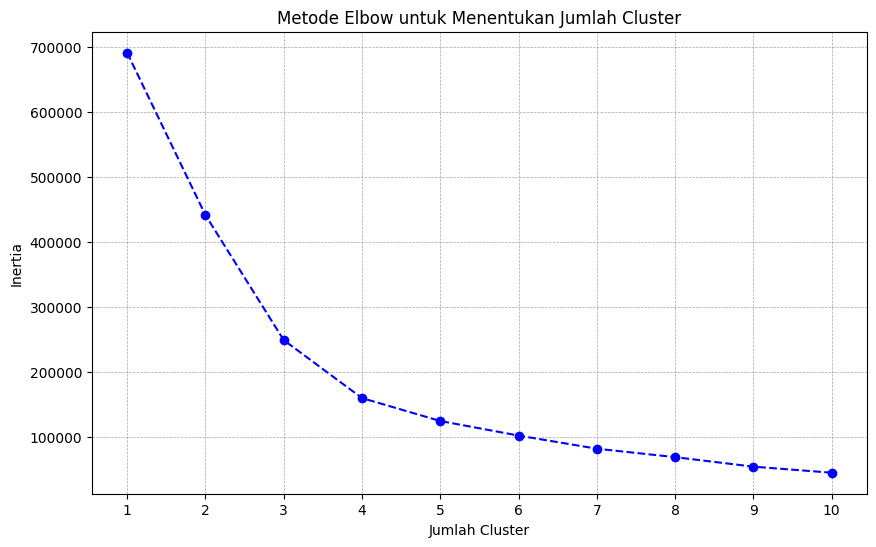

In [85]:
# Import Library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
# (Gunakan X yang sudah diproses sebelumnya dengan atribut hunian dan numerik)
# X adalah data yang telah di-encode sebelumnya

# Step 2: Inertia untuk Metode Elbow
inertia = []  # List untuk menyimpan nilai inertia
cluster_range = range(1, 11)  # Menguji untuk 1-10 cluster

# Menghitung inertia untuk setiap jumlah cluster
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)  # Data X adalah dataset yang sudah disiapkan
    inertia.append(kmeans.inertia_)

# Step 3: Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


In [88]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94661 entries, 0 to 95065
Data columns (total 32 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Kecamatan                                        94661 non-null  int64
 1   Desil Kesejahteraan                              94661 non-null  int64
 2   Persentil                                        94661 non-null  int64
 3   Prioritas Verval                                 94661 non-null  int64
 4   NIK Kepala Keluarga Padan Kemdagri               94661 non-null  int64
 5   Jenis Kelamin Kepala Keluarga                    94661 non-null  int64
 6   Pekerjaan Kepala Keluarga                        94661 non-null  int64
 7   Status Pekerjaan Kepala Keluarga                 94661 non-null  int64
 8   Pendidikan Kepala Keluarga                       94661 non-null  int64
 9   Status Kawin Kepala Keluarga                     94661 

In [90]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94661 entries, 0 to 95065
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Kecamatan                                        94661 non-null  int64
 1   Desil Kesejahteraan                              94661 non-null  int64
 2   Persentil                                        94661 non-null  int64
 3   Prioritas Verval                                 94661 non-null  int64
 4   NIK Kepala Keluarga Padan Kemdagri               94661 non-null  int64
 5   Jenis Kelamin Kepala Keluarga                    94661 non-null  int64
 6   Pekerjaan Kepala Keluarga                        94661 non-null  int64
 7   Status Pekerjaan Kepala Keluarga                 94661 non-null  int64
 8   Pendidikan Kepala Keluarga                       94661 non-null  int64
 9   Status Kawin Kepala Keluarga                     94661 

In [94]:
from sklearn.cluster import KMeans

# Pilih atribut numerik yang relevan untuk klasterisasi (misalnya: 'Kepemilikan Rumah', 'Kualitas Atap', dll.)
X = df_cleaned[['Kecamatan', 'Kepemilikan Rumah', 'Kualitas Atap', 'Kualitas Dinding', 'Kualitas Lantai',
        'Sumber Penerangan', 'Bahan Bakar Memasak', 'Sumber Air Minum']]

# Membuat model KMeans dengan 3 klaster
km = KMeans(n_clusters=3, random_state=42)

# Melakukan klasterisasi
y_predicted = km.fit_predict(X)

# Menambahkan kolom 'Clusters' yang berisi hasil klasterisasi ke dalam DataFrame
df_cleaned['Clusters'] = y_predicted

# Menampilkan pusat klaster (centroids) yang dihasilkan oleh KMeans
print("Cluster Centers (Centroids):")
print(km.cluster_centers_)

# Menampilkan DataFrame dengan kolom baru 'Clusters'
print(df.head())


Cluster Centers (Centroids):
[[5.33537393 3.69769643 0.2692332  0.2692332  0.2692332  1.08299148
  1.99596087 1.03792995]
 [1.52699687 3.5957797  0.96239601 0.96239601 0.96239601 1.03785197
  1.96056992 4.87952296]
 [5.76813024 3.56162396 0.80127108 0.80127108 0.80127108 1.04637395
  1.98784062 5.20380742]]
               0
0  694933.709896
1  444047.136098
2  250801.730330
3  161069.630797
4  125485.360781


In [95]:
df_cleaned

,Kecamatan,Desil Kesejahteraan,Persentil,Prioritas Verval,NIK Kepala Keluarga Padan Kemdagri,Jenis Kelamin Kepala Keluarga,Pekerjaan Kepala Keluarga,Status Pekerjaan Kepala Keluarga,Pendidikan Kepala Keluarga,Status Kawin Kepala Keluarga,...,Memiliki fasilitas Buang Air Besar,Resiko Stunting,Penerima BPNT,Penerima BPUM,Penerima BST,Penerima PKH,Penerima SEMBAKO,Penerima Prakerja,Penerima KUR,Clusters
0,5,1,5,2,1,0,8,4,5,3,...,2,1,1,0,0,1,0,1,0,2
1,5,1,3,2,1,1,2,4,5,2,...,2,1,1,0,0,0,0,0,0,2
2,5,1,8,2,0,0,9,4,6,3,...,2,1,0,1,0,0,0,0,1,2
3,5,1,2,2,1,0,9,4,7,3,...,2,2,0,1,0,0,0,0,0,2
4,5,1,7,2,0,1,6,4,5,1,...,2,1,1,0,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95061,1,4,36,2,1,0,9,4,6,3,...,2,0,0,0,0,0,0,0,0,1
95062,1,4,36,2,1,0,3,4,6,3,...,2,0,0,0,0,0,0,0,0,1
95063,1,4,33,2,1,0,2,4,5,3,...,2,0,0,0,0,0,0,0,0,1
95064,1,4,33,0,1,0,9,4,7,3,...,2,0,0,0,0,0,0,0,0,1


In [97]:
# Melihat jumlah kecamatan dalam setiap klaster
print(df_cleaned.groupby('Clusters')['Kecamatan'].count())


Clusters
0    15845
1    44357
2    34459
Name: Kecamatan, dtype: int64
